In [3]:
import numpy as np
import pandas as pd
import laspy as lp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy
import glob
import os
import datetime

In [52]:
# dataframe for storing results:

results_df = pd.DataFrame(columns = ['period_ms', 'max_speed_wifi', 'sp_mean', 'sp_std', 'sp_99pc', 'pc_speed_ex', 'st_mean', 'st_std', 'st_99pc'])
# results_df = results_df.set_index('period_ms')
results_df = results_df.reset_index()
results_df

,index,period_ms,max_speed_wifi,sp_mean,sp_std,sp_99pc,pc_speed_ex,st_mean,st_std,st_99pc


In [53]:
results_df

,index,period_ms,max_speed_wifi,sp_mean,sp_std,sp_99pc,pc_speed_ex,st_mean,st_std,st_99pc


In [7]:
periods = ['1 ms', '2 ms', '3 ms', '5 ms', '10 ms', '20 ms', '50 ms', '100 ms', '200 ms', '500 ms', '1000 ms']

In [8]:
max_speed = 78

In [54]:
for period in periods:
    filepath1 = "IROS_Dataset/fast_drone/events.txt"
    filepath2 = "IROS_Dataset/light_variations/strobe/events.txt"
    filepath3 = "IROS_Dataset/what_is_background/events.txt"
    filepath4 = "IROS_Dataset/multiple_objects/1_obj/events.txt"
    filepath5 = "IROS_Dataset/multiple_objects/2_objs/events.txt"
    filepath6 = "IROS_Dataset/multiple_objects/3_objs/events.txt"
    filepath7 = "IROS_Dataset/occlusions/events.txt"

    filepaths = [filepath1, filepath2, filepath4, filepath5, filepath6, filepath7]

    # reading files and combining them

    # events_all = pd.DataFrame()
    events_all_freq = pd.DataFrame()

    for i in range(len(filepaths)):
        print('processing file ' + str(i+1) + ' of ' + str(len(filepaths)))
        path = filepaths[i]

        events = pd.read_csv(path, delimiter=' ', header=None)
        events = events.rename(columns={0:'ts', 1:'x', 2:'y', 3:'p'})

        events.sort_values('ts', axis=0)       # sorting wr to time

    #     if len(events_all.index) == 0:
    #         events_all = events
    #     else:
    #         events_all.append(events)

        # calculating the number of events per period of aggregation

        events_freq = events.copy()
        events_freq['ts'] = events_freq['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x))   # converting timestamps to datetime format                                                                    #convert timestamps to ts
        events_freq['freq'] = 1                         # frequency of events
        events_freq = events_freq.set_index('ts')       # set ts as index
        events_freq_res = events_freq['freq'].resample(period).sum().to_frame()       # resample to find events per ms

        if len(events_all_freq.index) == 0:
            events_all_freq = events_freq_res
        else:
            events_all_freq.append(events_freq_res)

    period_ms = int(period.split(" ")[0])

    periods_ex = events_all_freq[events_all_freq['freq'] > max_speed * period_ms * 10**-3 * 10**6 / (8*8)]
    pc_periods_ex = len(periods_ex.index)/len(events_all_freq.index)

    max_speed_wifi = max_speed
    sp_mean = np.mean(events_all_freq['freq']) * 8*8 / (period_ms*10**-3*10**6)
    sp_std = np.std(events_all_freq['freq']) * 8*8 / (period_ms*10**-3*10**6)
    sp_99pc = np.percentile(events_all_freq['freq'], 99) * 8*8 / (period_ms*10**-3*10**6)
    pc_speed_ex = pc_periods_ex

    st_mean = np.mean(events_all_freq['freq']) * 8
    st_std = np.std(events_all_freq['freq']) * 8
    st_99pc = np.percentile(events_all_freq['freq'], 99) * 8

    new_row = {'period_ms':period_ms, 'max_speed_wifi':max_speed_wifi, 'sp_mean':sp_mean, 'sp_std':sp_std, 'sp_99pc':sp_99pc, 'pc_speed_ex':pc_speed_ex, 'st_mean':st_mean, 'st_std':st_std, 'st_99pc':st_99pc}

    results_df = results_df.append(new_row, ignore_index = True)
    
    print('process complete.')

processing file 1 of 6
processing file 2 of 6
processing file 3 of 6
processing file 4 of 6
processing file 5 of 6
processing file 6 of 6
process complete.
processing file 1 of 6
processing file 2 of 6
processing file 3 of 6
processing file 4 of 6
processing file 5 of 6
processing file 6 of 6
process complete.
processing file 1 of 6
processing file 2 of 6
processing file 3 of 6
processing file 4 of 6
processing file 5 of 6
processing file 6 of 6
process complete.
processing file 1 of 6
processing file 2 of 6
processing file 3 of 6
processing file 4 of 6
processing file 5 of 6
processing file 6 of 6
process complete.
processing file 1 of 6
processing file 2 of 6
processing file 3 of 6
processing file 4 of 6
processing file 5 of 6
processing file 6 of 6
process complete.
processing file 1 of 6
processing file 2 of 6
processing file 3 of 6
processing file 4 of 6
processing file 5 of 6
processing file 6 of 6
process complete.
processing file 1 of 6
processing file 2 of 6
processing file 3 

In [56]:
results_df.to_csv('results_wifi_aggregation.csv')

In [55]:
results_df

,index,period_ms,max_speed_wifi,sp_mean,sp_std,sp_99pc,pc_speed_ex,st_mean,st_std,st_99pc
0,NaN,1.0,78.0,19.414953,26.038331,97.536000,0.020979,2.426869e+03,3254.791326,12192.00
1,NaN,2.0,78.0,19.395577,22.211257,93.856000,0.017964,4.848894e+03,5552.814171,23464.00
2,NaN,3.0,78.0,19.395577,20.775761,67.394987,0.008982,7.273341e+03,7790.910504,25273.12
3,NaN,5.0,78.0,19.337680,17.314049,71.360000,0.009950,1.208605e+04,10821.280395,44600.00
4,NaN,10.0,78.0,19.241949,15.839510,82.758400,0.019802,2.405244e+04,19799.387256,103448.00
5,NaN,20.0,78.0,19.053302,15.070656,69.460800,0.019608,4.763325e+04,37676.640036,173652.00
6,NaN,50.0,78.0,18.508922,12.687324,47.225856,0.000000,1.156808e+05,79295.778043,295161.60
7,NaN,100.0,78.0,17.667607,12.845236,44.720960,0.000000,2.208451e+05,160565.455405,559012.00
8,NaN,200.0,78.0,16.195307,9.082729,30.434592,0.000000,4.048827e+05,227068.232244,760864.80
9,NaN,500.0,78.0,12.956245,7.591523,21.321521,0.000000,8.097653e+05,474470.206939,1332595.04


<AxesSubplot:xlabel='period_ms'>

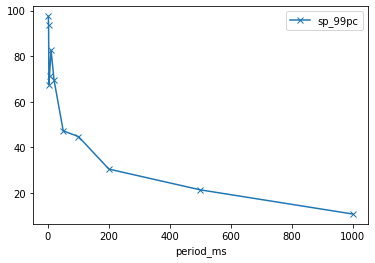

In [67]:
results_df.plot(x = 'period_ms', y = 'sp_99pc', marker = 'x')

<AxesSubplot:xlabel='period_ms'>

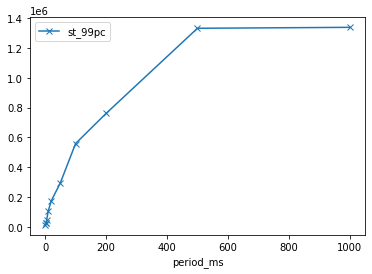

In [66]:
results_df.plot(x = 'period_ms', y = 'st_99pc', marker = 'x')

In [ ]:
use larger ds